In [1]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import jax 
import jax.numpy as np
import fenton_karma as fk
import deepexcite
from IPython.display import HTML

## SEPARATE DIFFUSION AND REACTION TERM

In [2]:
# simulation inputs (real values)
root = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/"
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = fk.params.PARAMSET_3

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# diffusivity 
d = 0.001  # cm^2/ms
shape = fk.convert.realsize_to_shape(field_size, dx)
diffusivity = np.ones(shape) * d

In [28]:
name = root + "train_dev_set/deepreact_spiral_params7.hdf5"

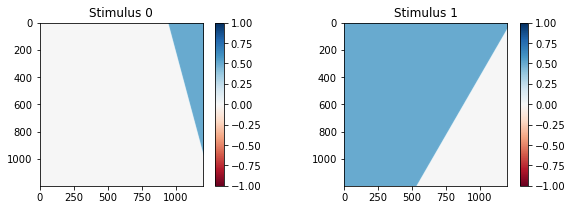

In [29]:
# times
start = 0  # ms
stop = 2000  # ms
reshape = (256, 256)
save_interval_ms = 1  # ms
show_every = 50  # ms

# stimuli
s1 = fk.stimulus.Protocol(start=0, duration=2, period=1e9)
s1 = fk.stimulus.triangular(shape, direction="right", angle=15, coverage=0.1, modulus=0.5, protocol=s1)

s2 = fk.stimulus.Protocol(start=fk.convert.ms_to_units(200, dt), duration=2, period=1e9)
s2 = fk.stimulus.triangular(shape, direction="up", angle=60, coverage=0.7, modulus=0.5, protocol=s2)

# s3 = fk.stimulus.protocol(start=fk.convert.ms_to_units(900, dt), duration=2)
# s3 = fk.stimulus.triangular(shape, direction="down", angle=30, coverage=0.7, modulus=1., protocol=s3)

stimuli = [s1, s2]
fk.plot.plot_stimuli(*stimuli)

In [30]:
# checkpoints = np.arange(start // dt, (stop - start) // dt, show_every // dt)
# states = fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

In [31]:
# deepexcite.data.generate.generate_fk(start=fk.convert.ms_to_units(start, dt),
#                  stop=fk.convert.ms_to_units(stop, dt),
#                  dt=dt, dx=dx,
#                  cell_parameters=cell_parameters,
#                  diffusivity=diffusivity,
#                  stimuli=stimuli,
#                  filename=name,
#                  reshape=reshape,
#                  save_interval_ms=save_interval_ms)

In [32]:
# display
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

(2000, 5, 256, 256)
(40, 5, 256, 256)


In [33]:
states = [fk.model.State(*state) for state in states]
animation = fk.plot.animate_state(states, figsize=(25, 5))
video = animation.to_jshtml()
HTML(video)

<IPython.core.display.Javascript object>

/home/ep119/.conda/envs/fk/lib/python3.8/site-packages/matplotlib/image.py:489: RuntimeWarning: overflow encountered in true_divide
  vrange /= ((a_max - a_min) / frac)


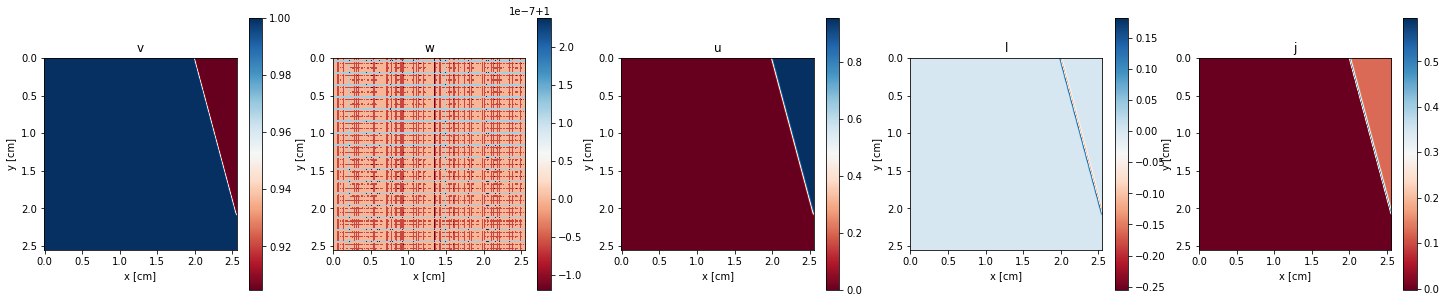

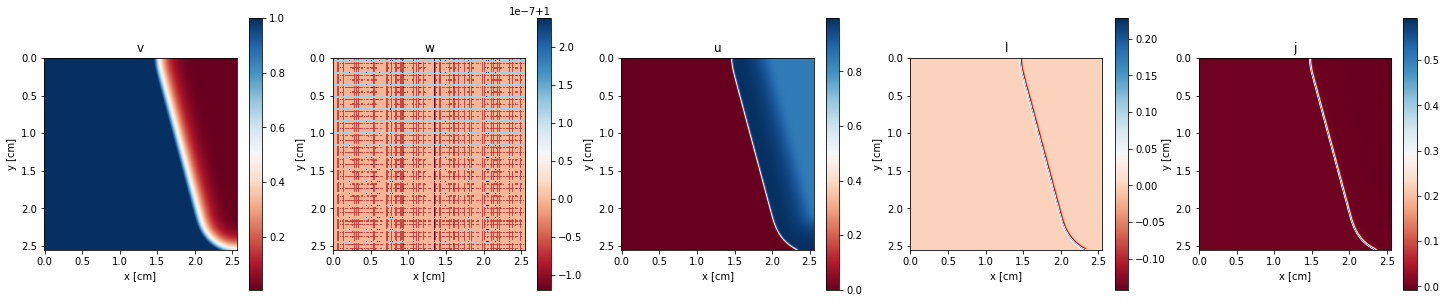

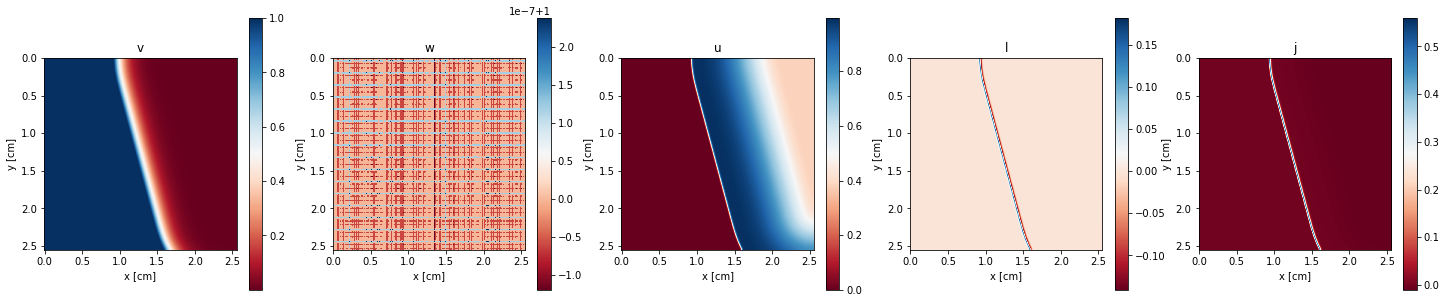

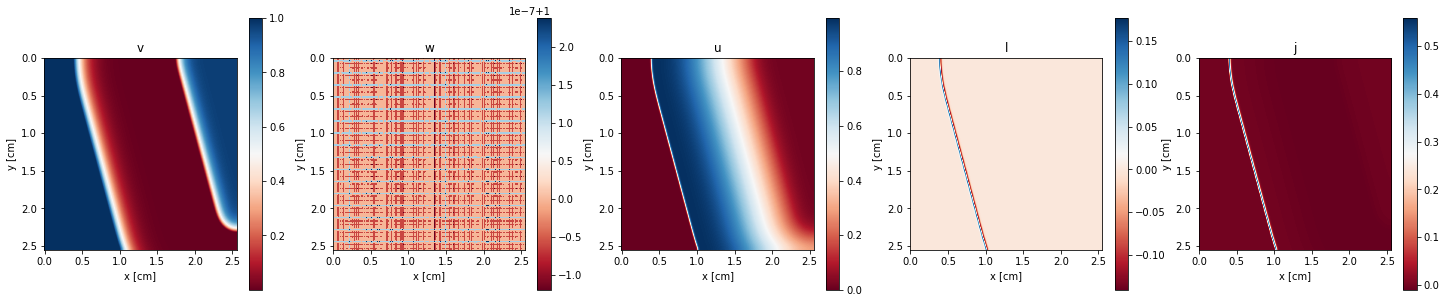

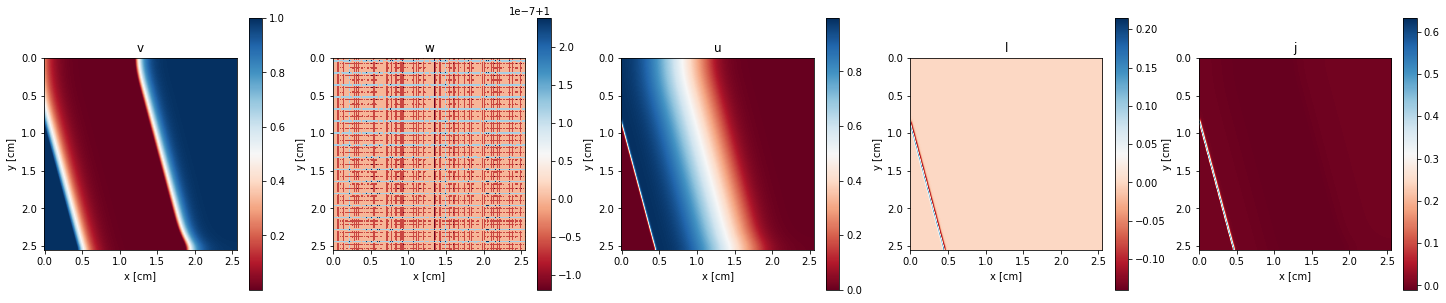

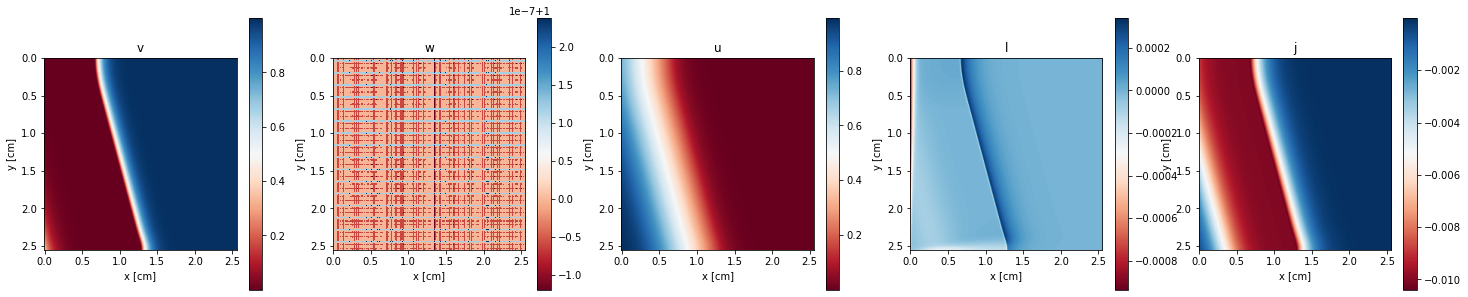

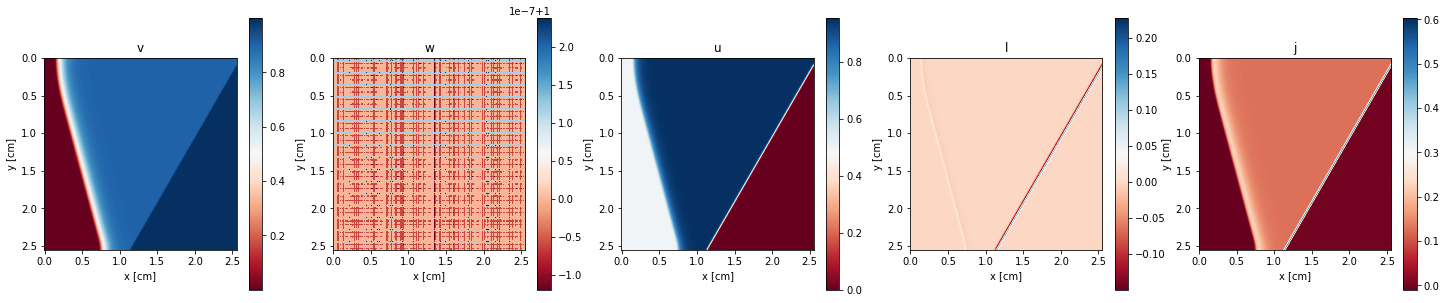

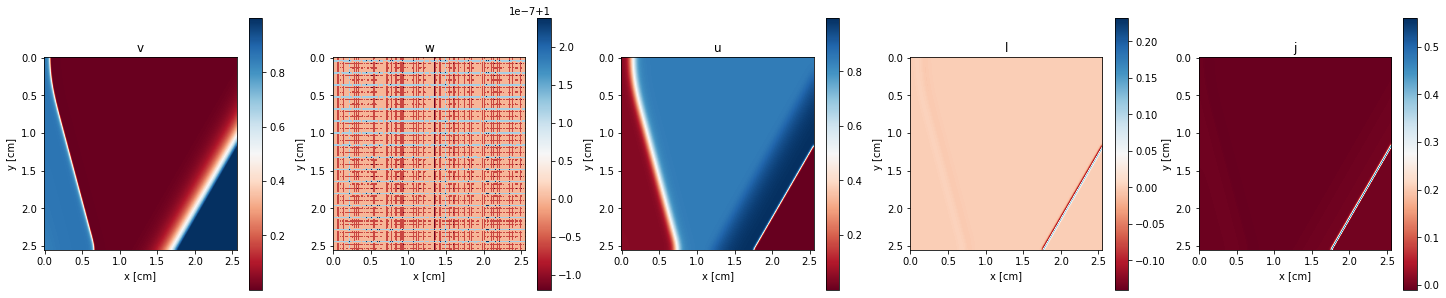

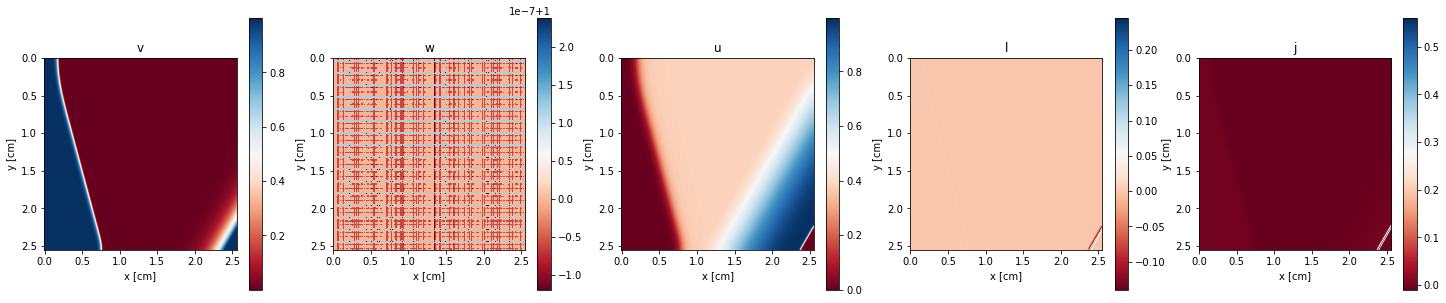

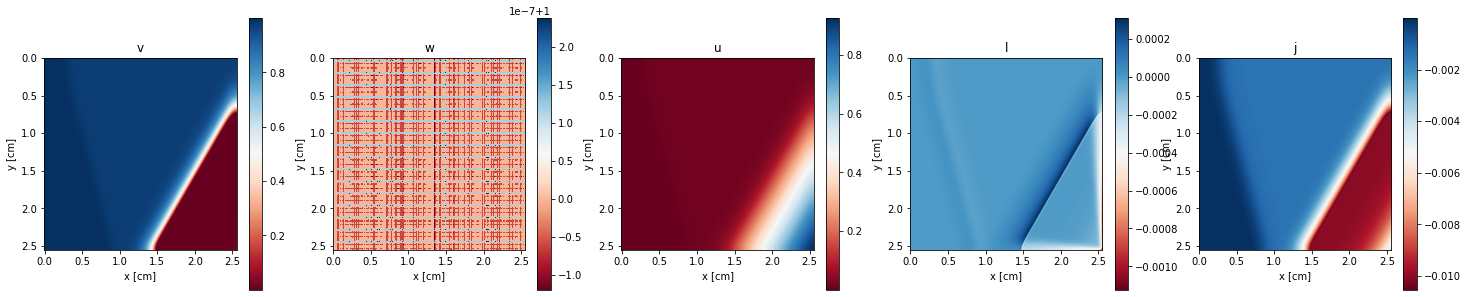

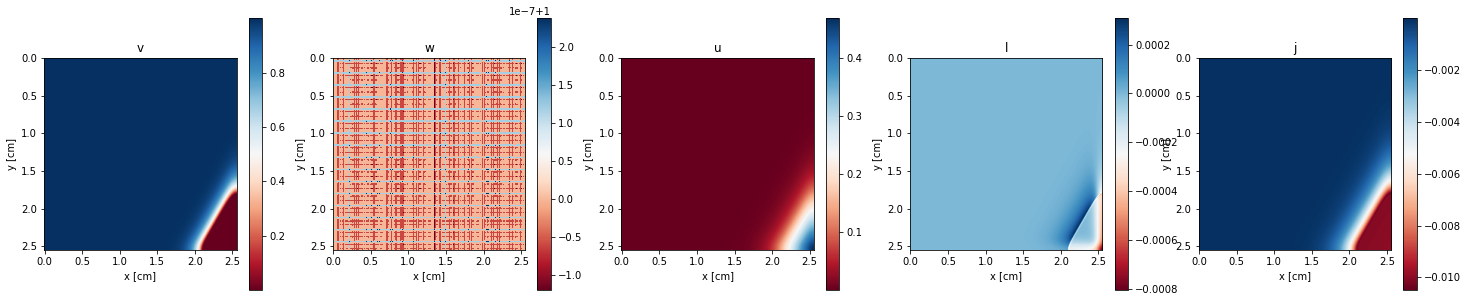

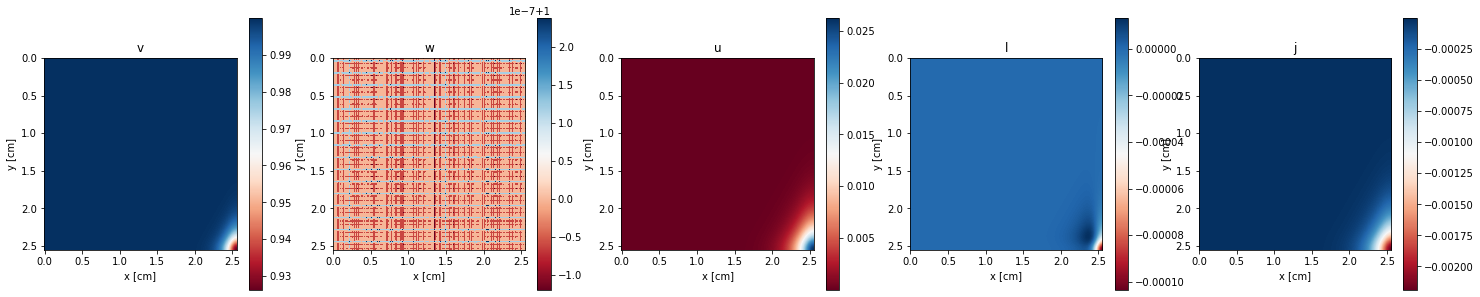

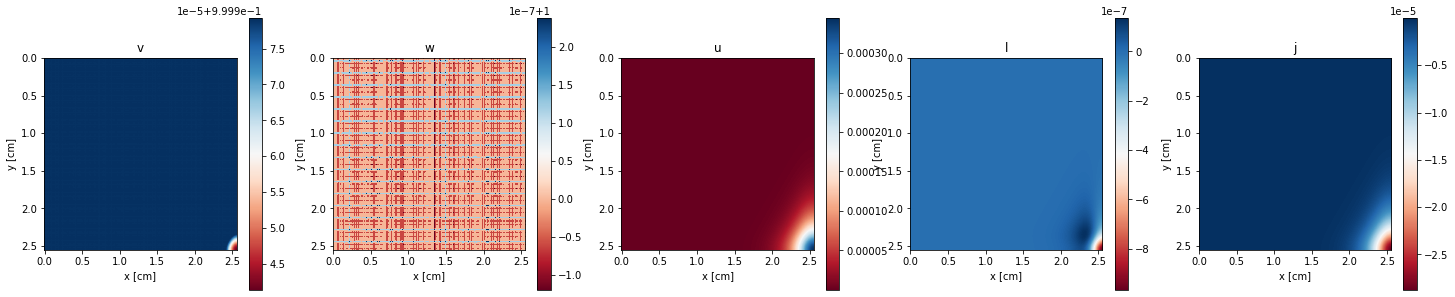

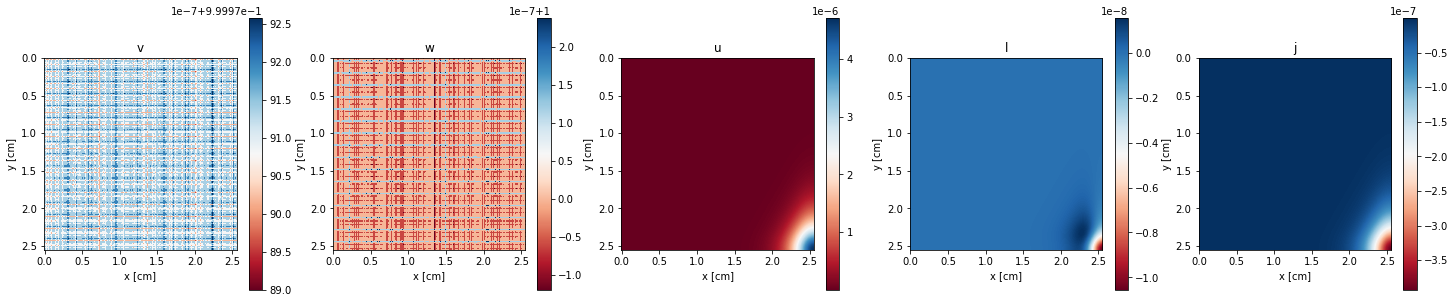

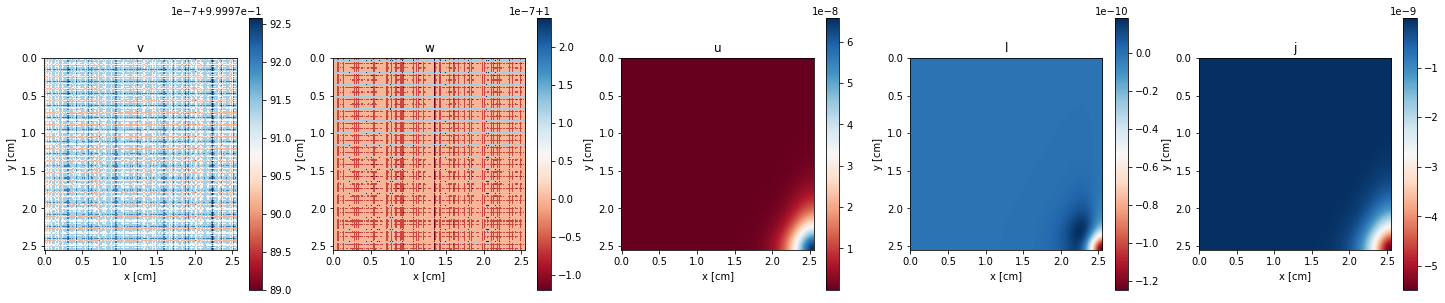

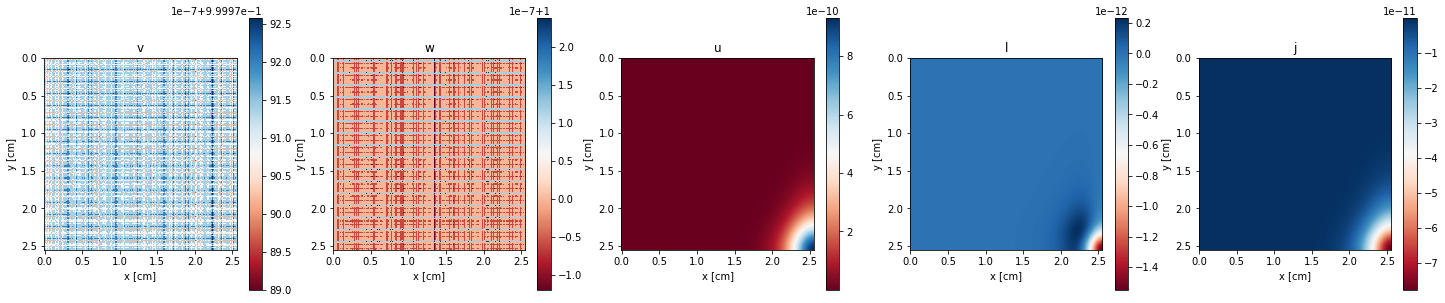

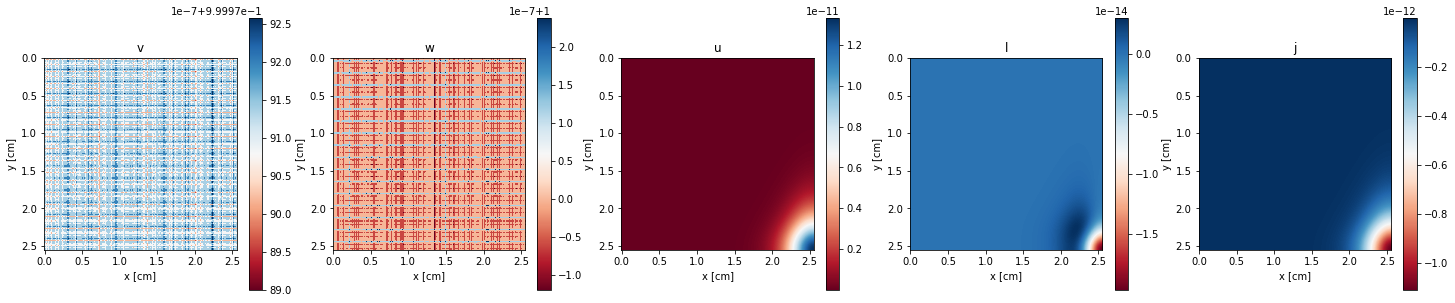

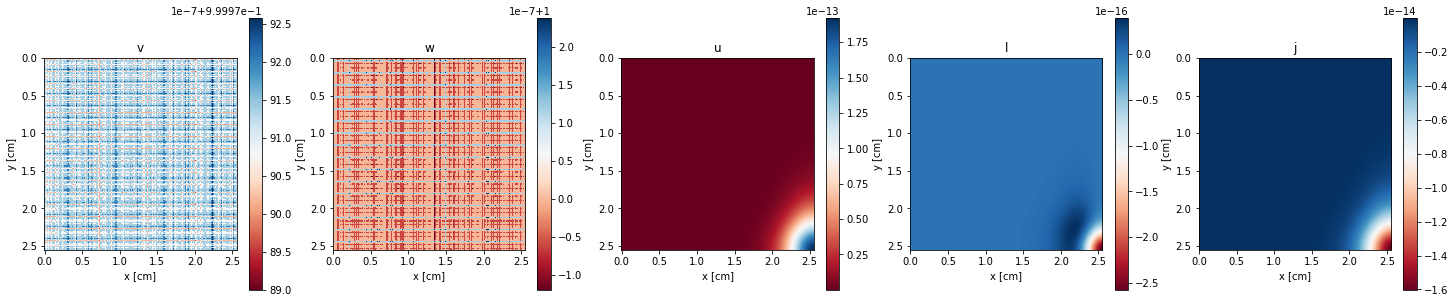

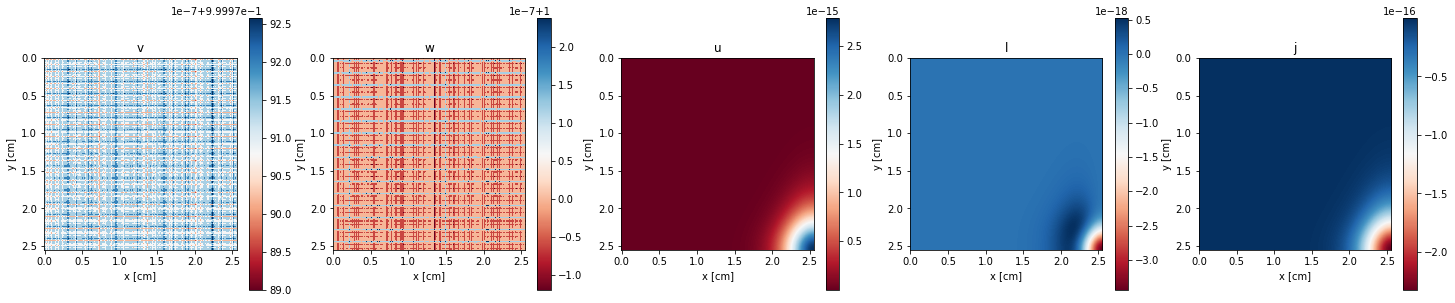

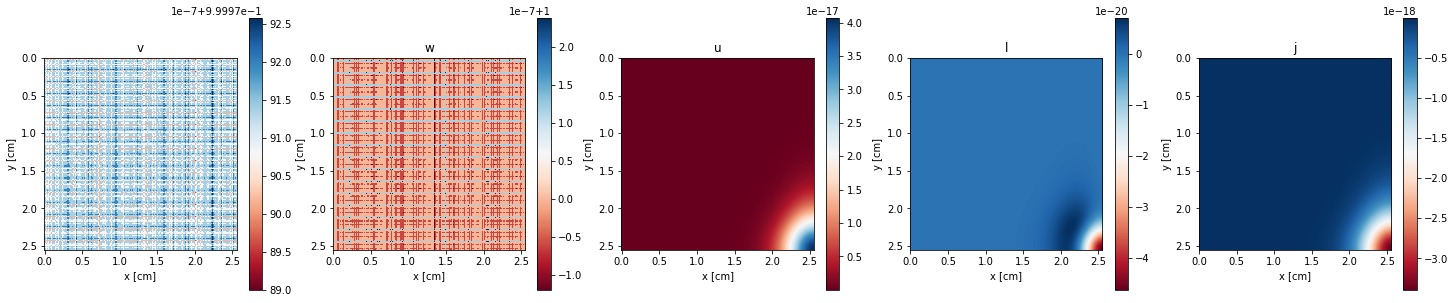

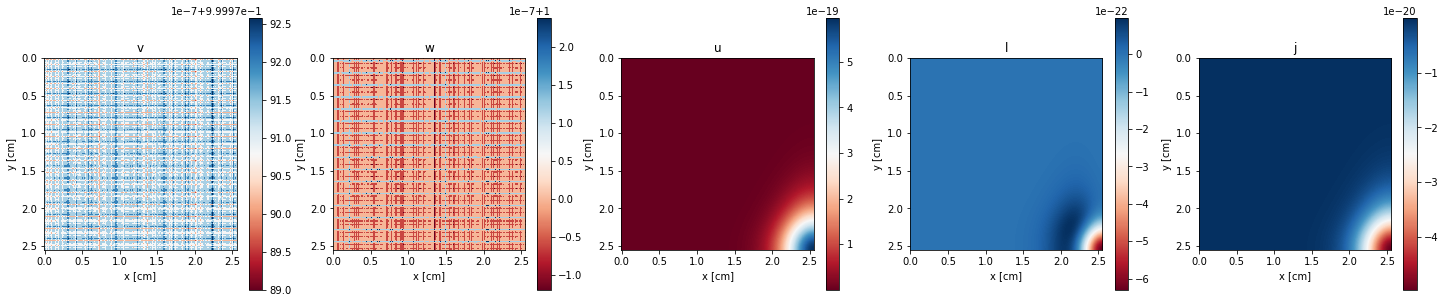

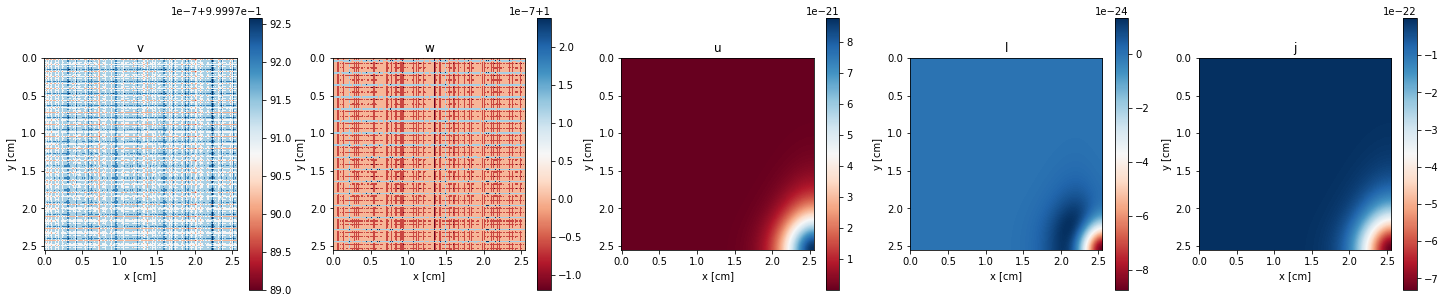

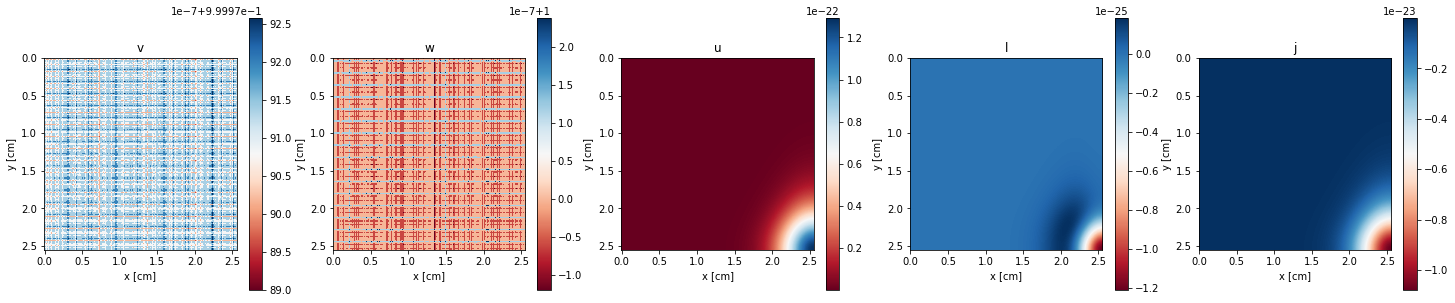

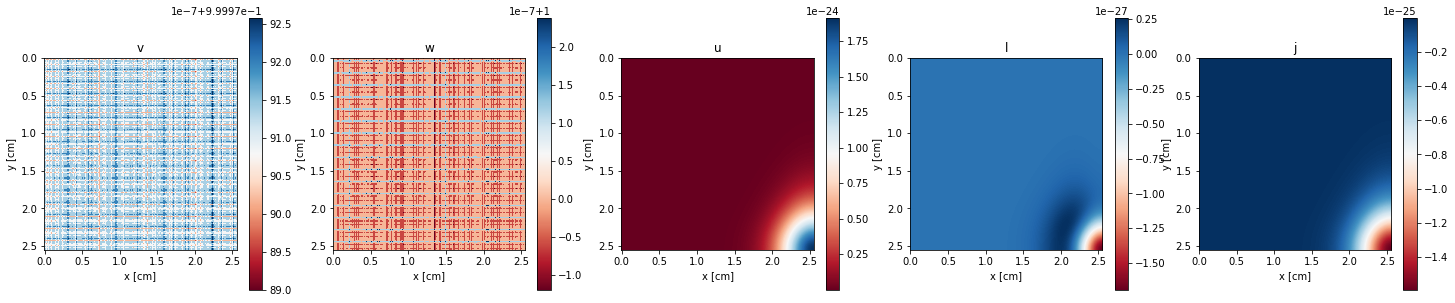

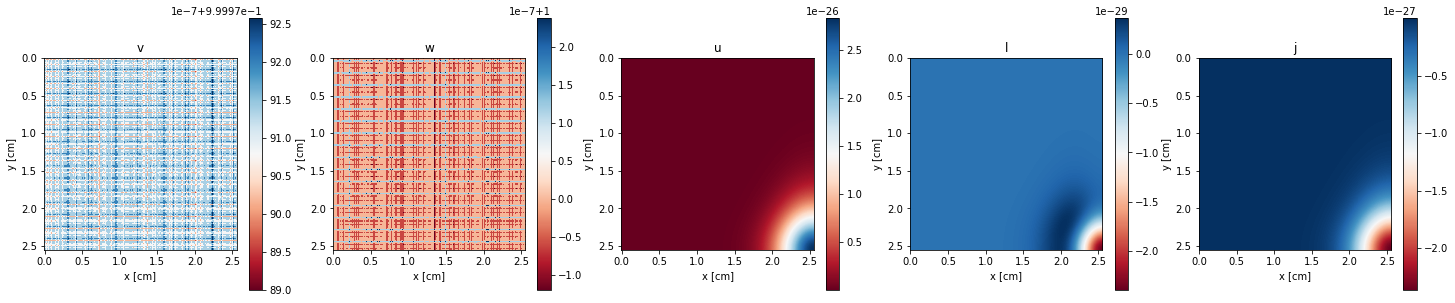

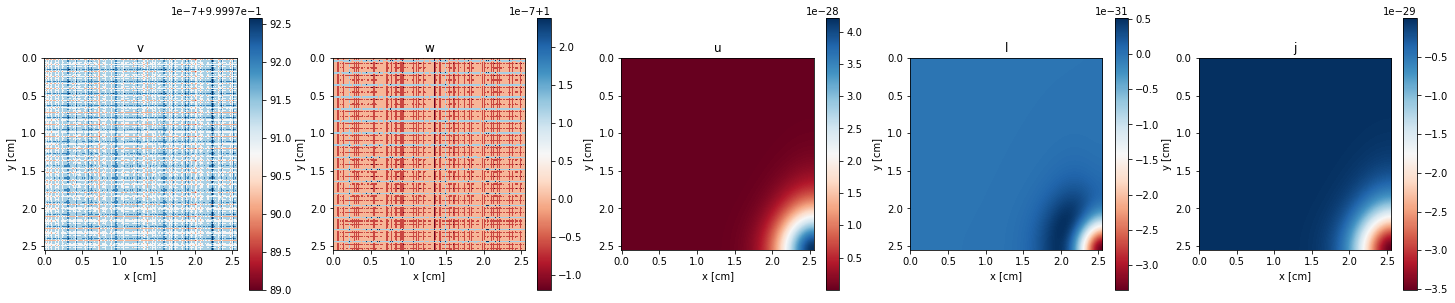

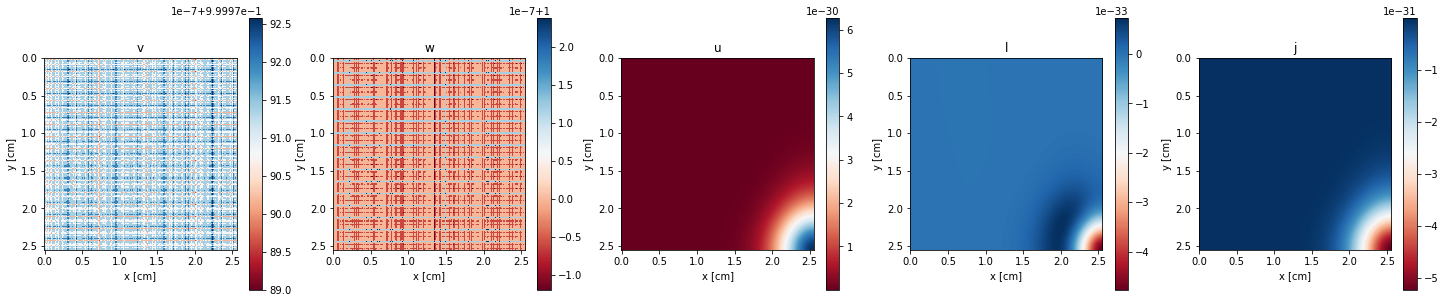

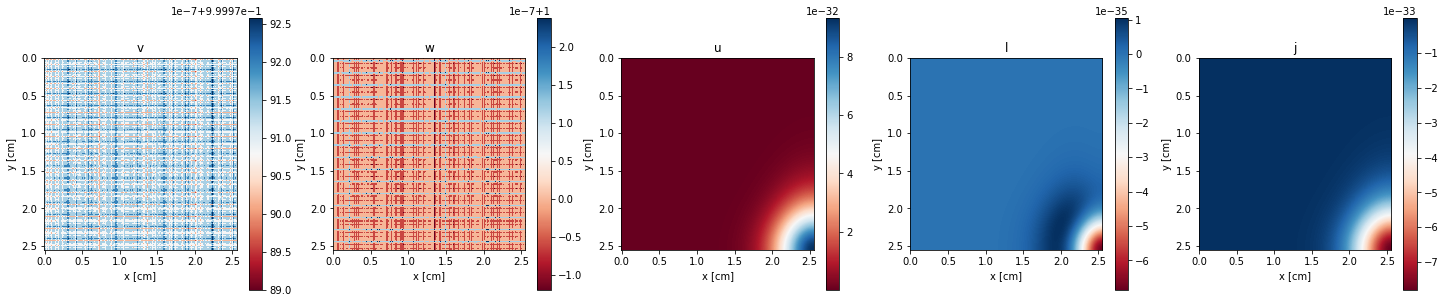

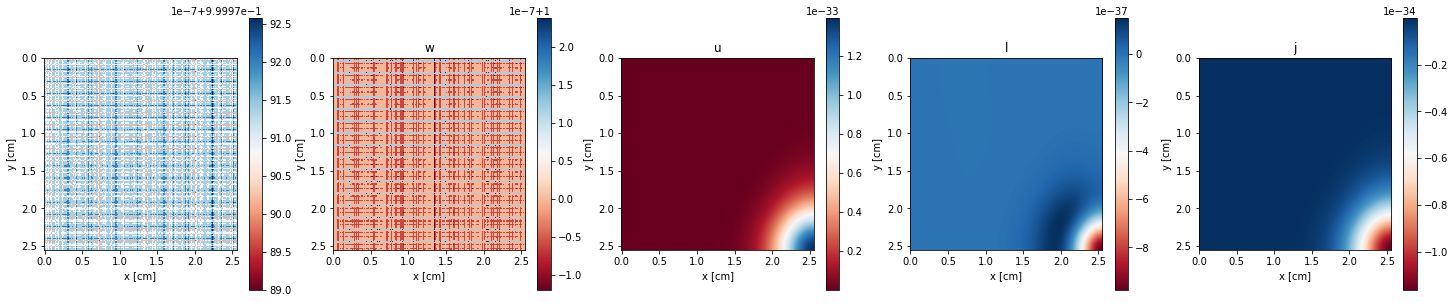

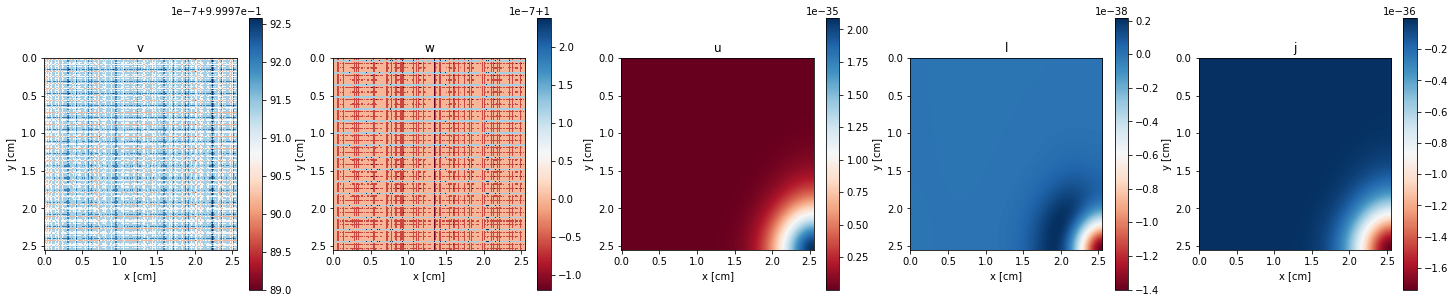

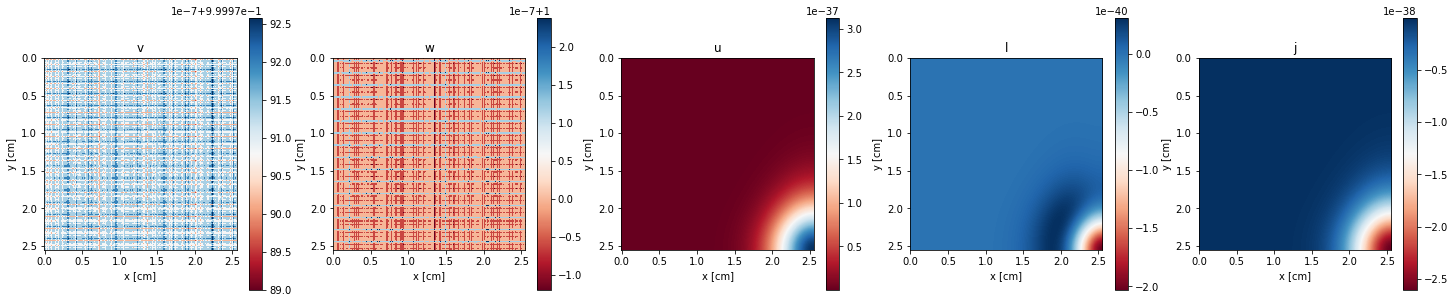

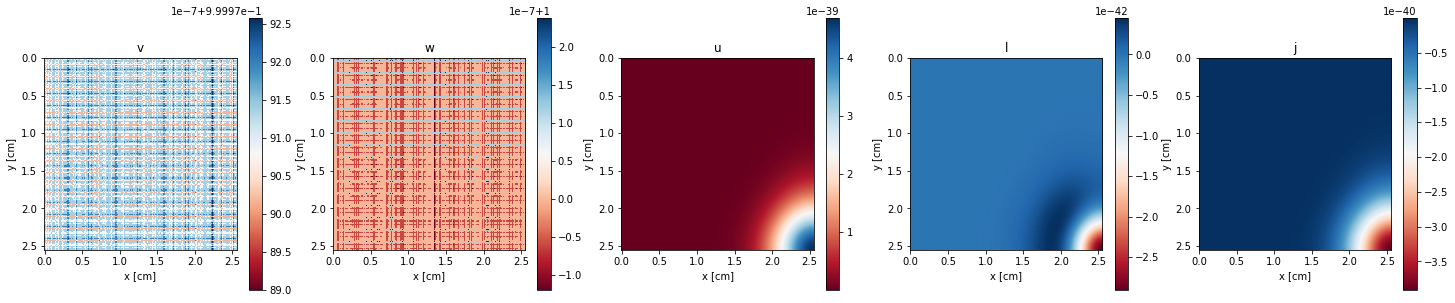

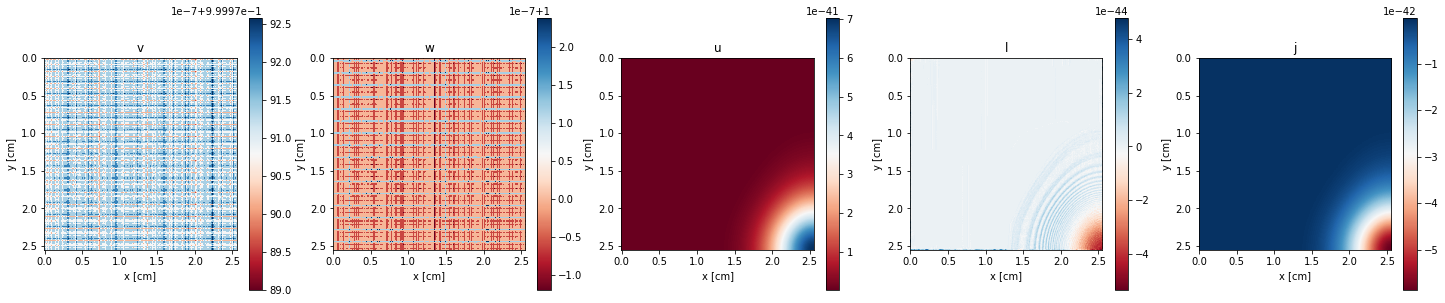

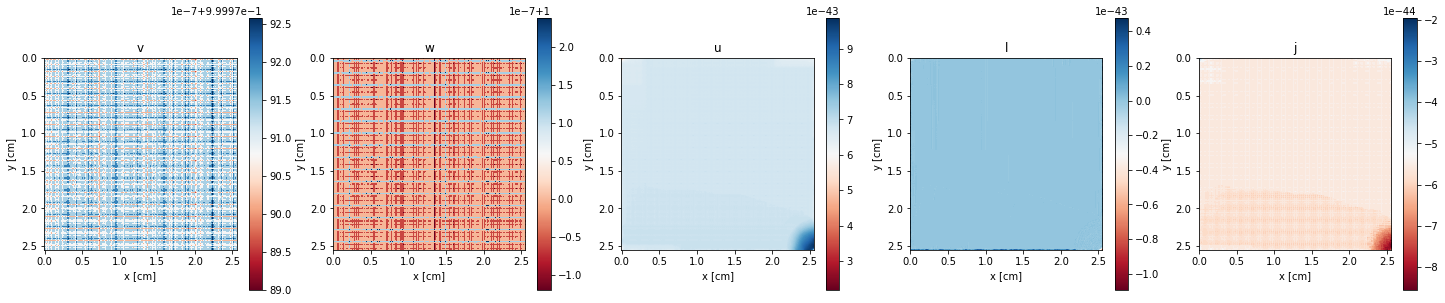

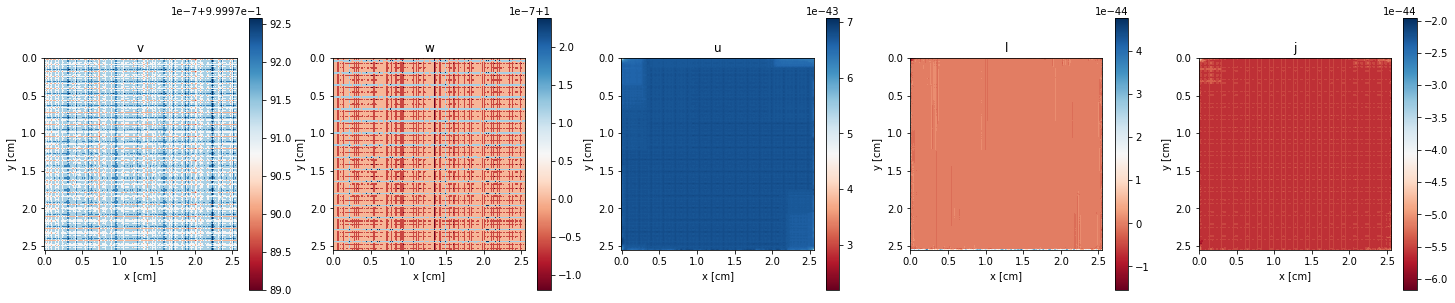

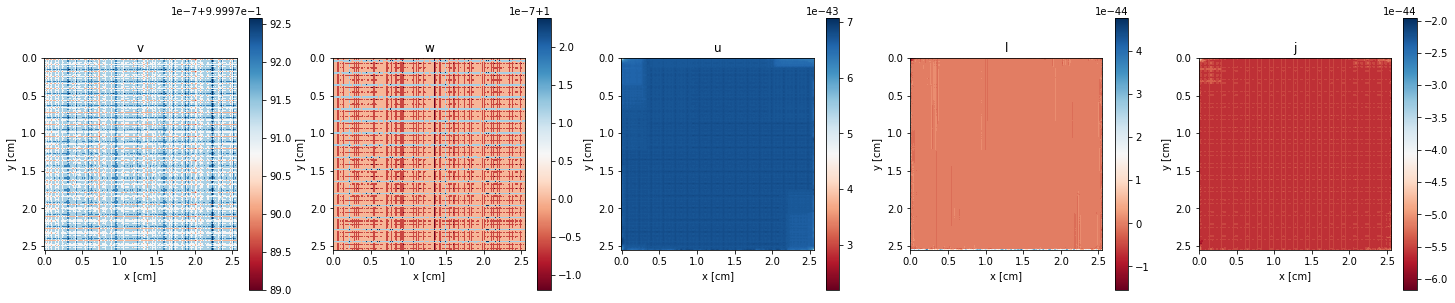

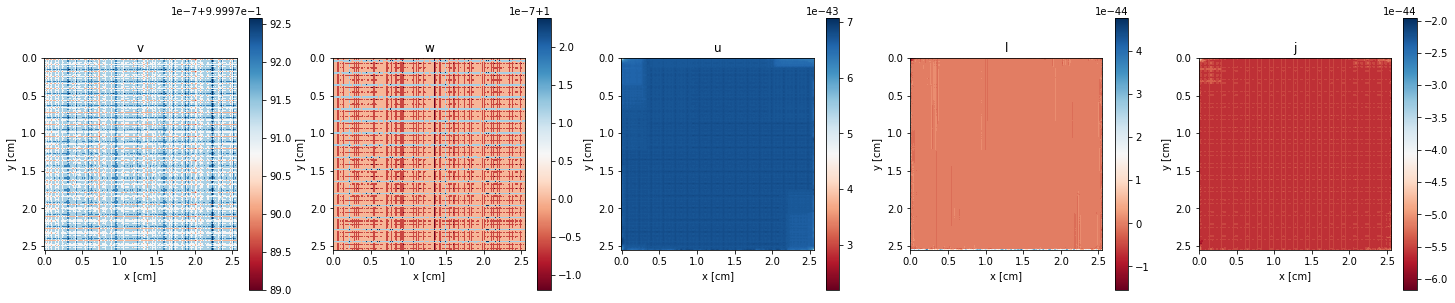

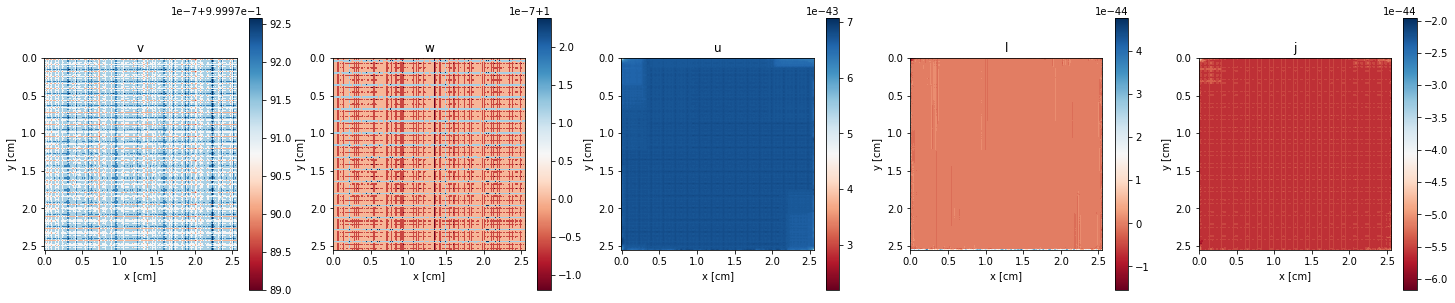

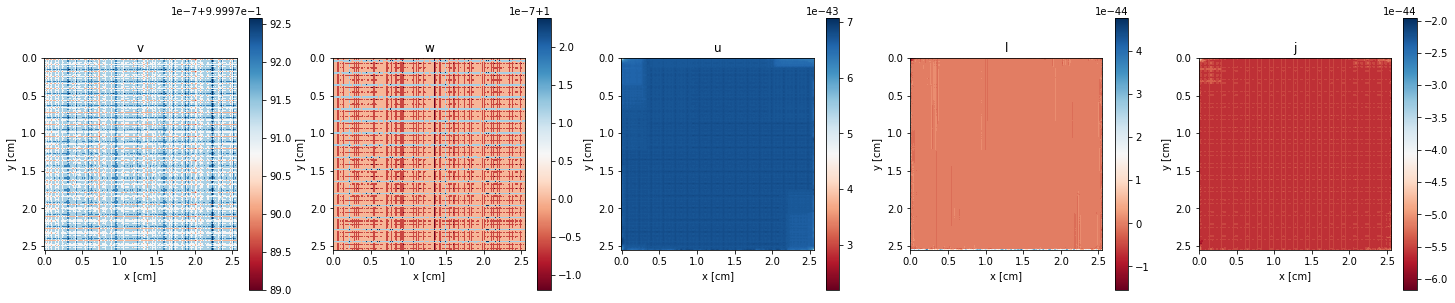

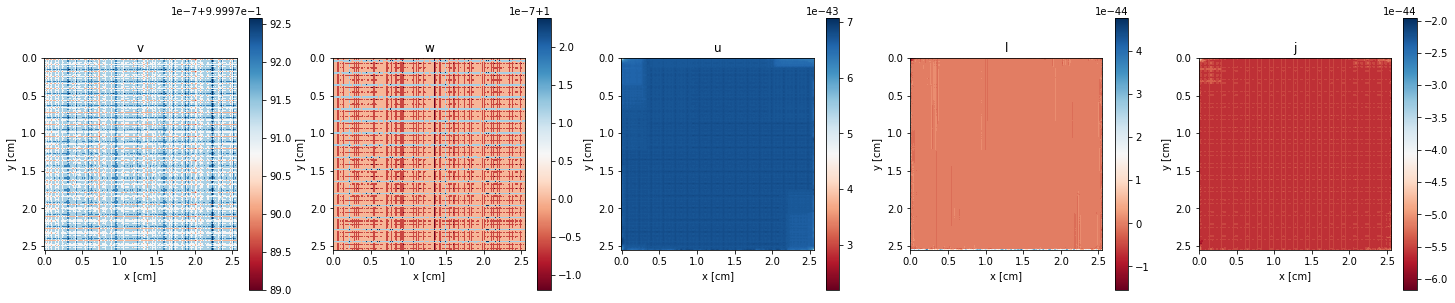

In [34]:
for state in states:
    state = fk.model.State(*state)
    fk.plot.plot_state(state, vmin=None, vmax=None)
    plt.show()